# Dimensionality reduction and visualizations of Doc2Vec embeddings

In [1]:
import pickle
import pandas as pd
import numpy as np

In [2]:
DATA_PATH = './data/cleaned/'
filename = 'concatenated_df_cleaned_glove_and_d2v.pkl'
with open(DATA_PATH + filename, 'rb') as f:
    df = pickle.load(f)

In [3]:
df.week_month_year.unique()
# use these as labels

array([ 5,  7,  9, 14, 15, 18, 20, 22])

In [5]:
df.head(3)

,created_at,user,id_str,retweeted_status,Hash words,link,entities,Topic Label,urls,no_link,...,user_id,cluster,is_retweet,hashtags,link_shorteners,article_text,article_text_cleaned,glove_avg,article_text_cleaned_string,d2v
0,2020-01-31 23:08:33+00:00,"{'id': 19031057, 'id_str': '19031057', 'name':...",1223382589689356288,NaN,#coronavirus,https://twitter.com/user/status/12233825896893...,"{'hashtags': [{'text': 'coronavirus', 'indices...","(43, 0.999852366207409)",[https://www.kron4.com/news/national/when-will...,False,...,19031057,43,False,[coronavirus],[False],"KRON4 by: Aubree Gordon, University of Michig...","[kron, aubree, gordon, university, michigan, c...","[0.14527764461177867, 1.301592749657575, 0.487...",kron aubree gordon university michigan coronav...,"[-0.003817135, -0.003027052, 0.0039573424, -0...."
1,2020-01-31 23:11:29+00:00,"{'id': 798925214, 'id_str': '798925214', 'name...",1223383328843280384,{'created_at': 'Fri Jan 31 20:41:20 +0000 2020...,#coronavirus #vaccine:,https://twitter.com/user/status/12233833288432...,"{'hashtags': [{'text': 'Coronavirus', 'indices...","(6, 0.9883827140131066)",[https://www.cnbc.com/2020/01/31/coronavirus-w...,False,...,798925214,6,True,"[Coronavirus, vaccine]",[False],U.S. and international health officials are s...,"[international, health, officials, speeding, w...","[0.4456857605208643, 1.4679776202002541, 0.697...",international health officials speeding work c...,"[-0.0010741099, -0.004670837, 0.0042367107, -0..."
2,2020-01-31 23:12:03+00:00,"{'id': 806144538049970176, 'id_str': '80614453...",1223383471999127552,NaN,No hashtags,https://twitter.com/user/status/12233834719991...,"{'hashtags': [], 'symbols': [], 'user_mentions...","(74, 0.9999928079220538)",[https://www.businessinsider.com/australia-suc...,False,...,806144538049970176,74,False,[None],[False],A leading-edge research firm focused on digit...,"[leading_edge, research, firm_focused, active,...","[-0.012559317511040717, 0.5841067982127425, 0....",leading_edge research firm_focused active sinc...,"[-0.00315866, -0.0013634955, -0.0027836896, 0...."


In [6]:
# make d2v vectors into dataframe to use PCA
dims = []
for i in range(100):
    dims.append('dim_' + str(i))
    
# glove vectors as features
d2v_vecs = df['d2v'].tolist()
features_df = pd.DataFrame([vec for vec in d2v_vecs], columns=dims)

# pca feature creation
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features_df)
pca_features = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [7]:
# apply labels by time of year
label = df['week_month_year'].tolist()
pca_df = pd.concat([pca_features, df[['week_month_year']]], axis=1)
pca_df.head()

,principal component 1,principal component 2,week_month_year
0,-0.004027,-0.004467,5
1,-0.003141,-0.002546,5
2,0.002598,-0.002082,5
3,0.006222,-0.000380,5
4,-0.000447,-0.003478,5


### PCA clumps all the documents together

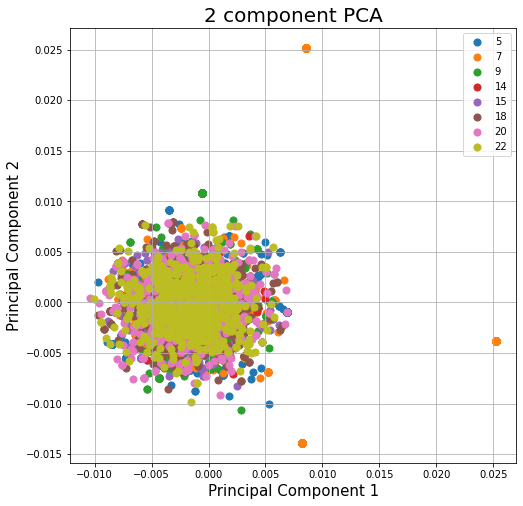

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


targets = pca_df['week_month_year'].unique().tolist()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan'] # 'tab:olive', 
for target, color in zip(targets,colors):
    indicesToKeep = pca_df['week_month_year'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'principal component 1'], 
               pca_df.loc[indicesToKeep, 'principal component 2'], 
               c = color, 
               s = 50)
    
    
# plt.xlim(-100, 500)
# plt.ylim(-100, 100)
    
ax.legend(targets)
ax.grid()

### plotting one by one

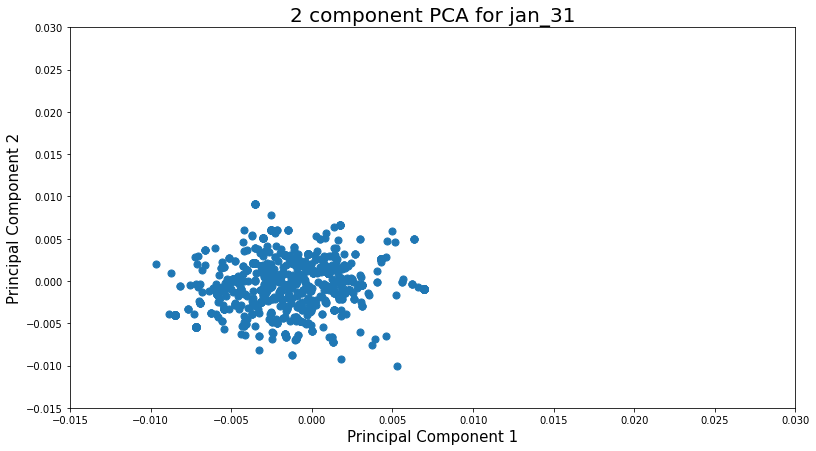

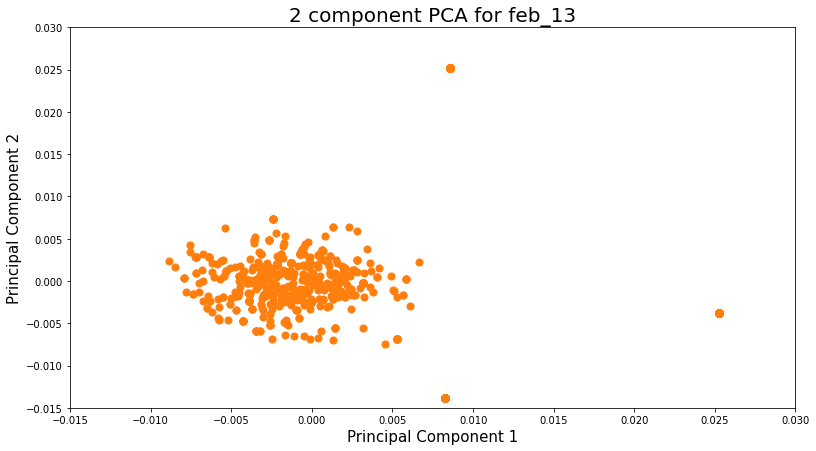

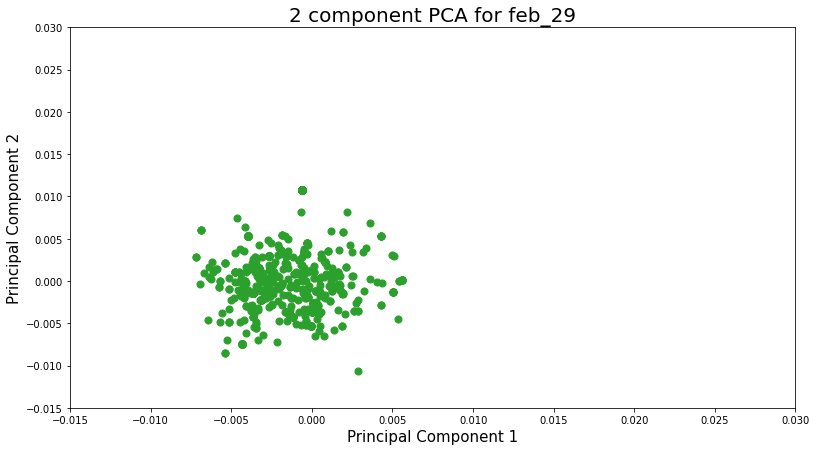

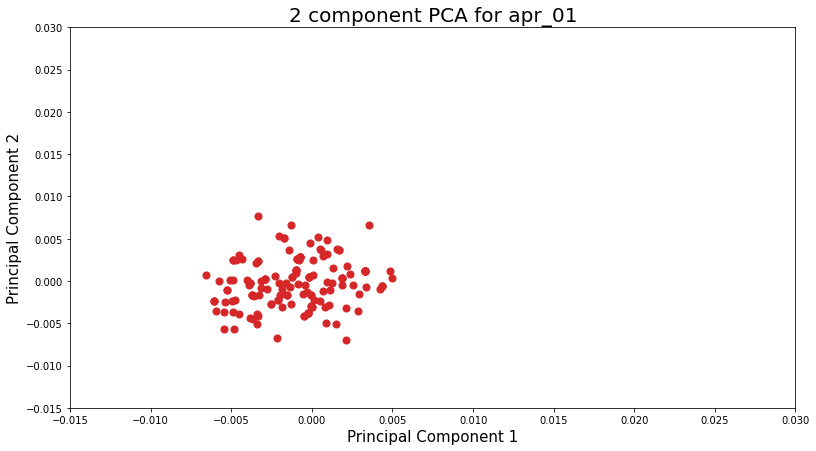

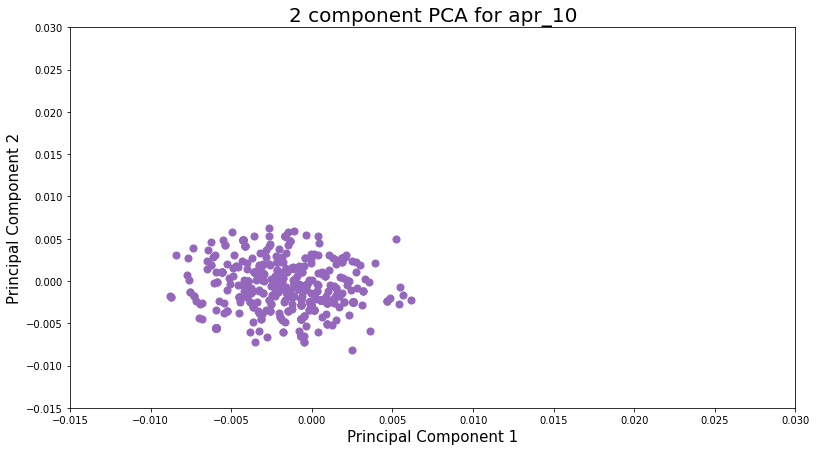

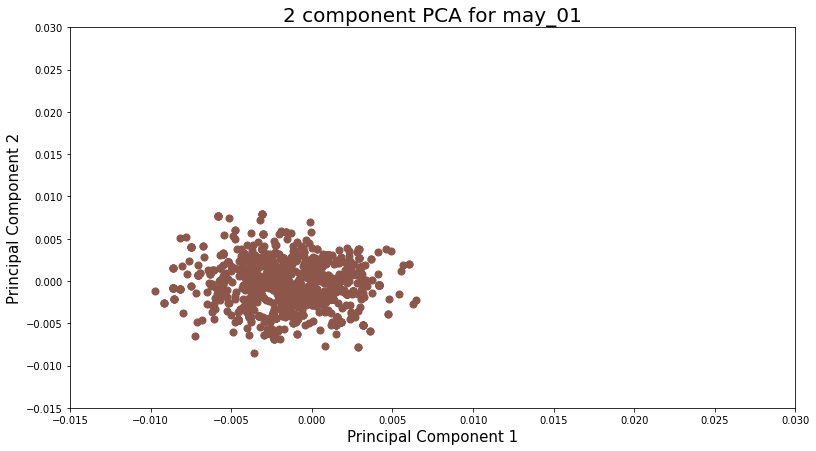

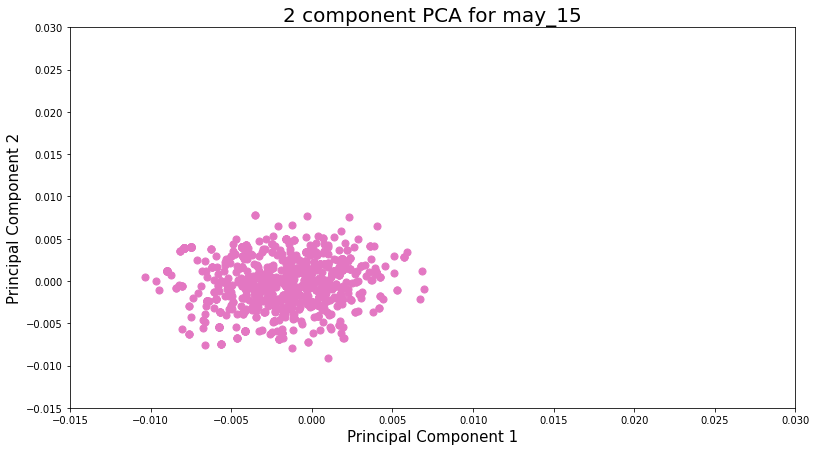

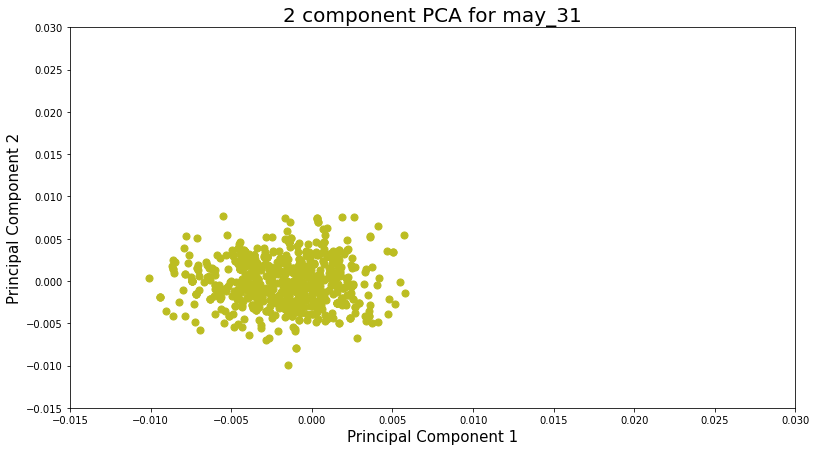

In [12]:
targets = pca_df['week_month_year'].unique().tolist()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan'] # 'tab:olive', 
dates = ['jan_31', 'feb_13', 'feb_29', 'apr_01', 'apr_10', 'may_01', 'may_15', 'may_31']
for target, color, date in zip(targets, colors, dates):
    indicesToKeep = pca_df['week_month_year'] == target
    plt.figure(figsize=(13,7))
    plt.scatter(pca_df.loc[indicesToKeep, 'principal component 1'], 
               pca_df.loc[indicesToKeep, 'principal component 2'], 
               c = color, 
               s = 50)
    
    plt.xlabel('Principal Component 1', fontsize = 15)
    plt.ylabel('Principal Component 2', fontsize = 15)
    plt.title('2 component PCA for ' + date, fontsize = 20)
        
    plt.xlim(-0.015, 0.030)
    plt.ylim(-0.015, 0.030)
    
#     plt.figure(figsize=(13,7))
    plt.show()
    


## t-sne

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7454 samples in 0.069s...
[t-SNE] Computed neighbors for 7454 samples in 11.983s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7454
[t-SNE] Computed conditional probabilities for sample 2000 / 7454
[t-SNE] Computed conditional probabilities for sample 3000 / 7454
[t-SNE] Computed conditional probabilities for sample 4000 / 7454
[t-SNE] Computed conditional probabilities for sample 5000 / 7454
[t-SNE] Computed conditional probabilities for sample 6000 / 7454
[t-SNE] Computed conditional probabilities for sample 7000 / 7454
[t-SNE] Computed conditional probabilities for sample 7454 / 7454
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.761543
[t-SNE] KL divergence after 300 iterations: 2.915416
t-SNE done! Time elapsed: 43.078530073165894 seconds


<AxesSubplot:xlabel='tsne_2d_one', ylabel='tsne_2d_two'>

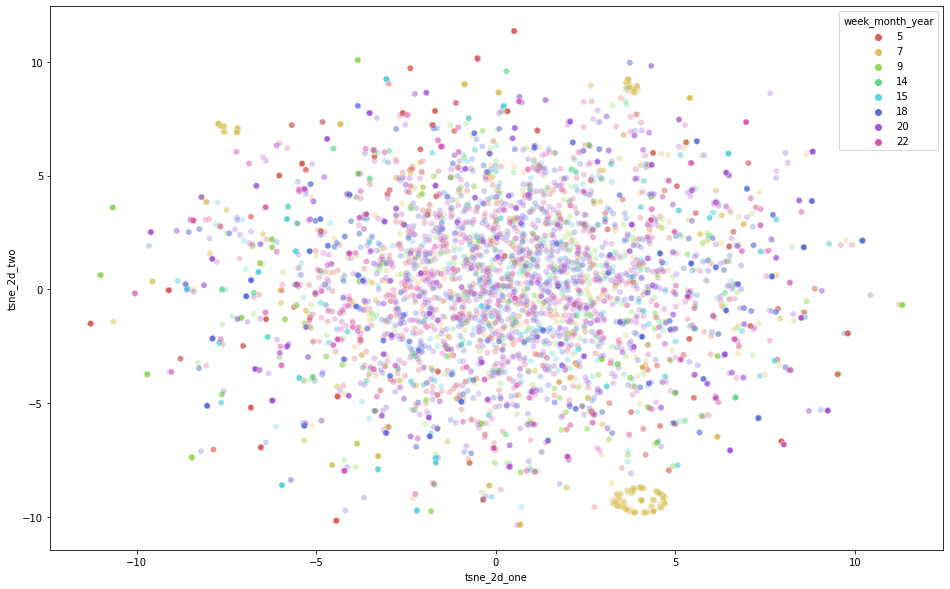

In [30]:
from sklearn.manifold import TSNE
import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(features_df)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


# plt.scatter(tsne_results[:,0], tsne_results[:,1])
# plt.figure(figsize=(16,10))
# plt.show()

df['tsne_2d_one'] = tsne_results[:,0]
df['tsne_2d_two'] = tsne_results[:,1]
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne_2d_one", y="tsne_2d_two",
    hue="week_month_year",
    palette=sns.color_palette("hls", 8),
    data=df,
    legend="full",
    alpha=0.3
)

#### 3-d tsne

In [33]:
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(features_df)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


df['tsne_3d_one'] = tsne_results[:,0]
df['tsne_3d_two'] = tsne_results[:,1]
df['tsne_3d_three'] = tsne_results[:,2]


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7454 samples in 0.076s...
[t-SNE] Computed neighbors for 7454 samples in 15.367s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7454
[t-SNE] Computed conditional probabilities for sample 2000 / 7454
[t-SNE] Computed conditional probabilities for sample 3000 / 7454
[t-SNE] Computed conditional probabilities for sample 4000 / 7454
[t-SNE] Computed conditional probabilities for sample 5000 / 7454
[t-SNE] Computed conditional probabilities for sample 6000 / 7454
[t-SNE] Computed conditional probabilities for sample 7000 / 7454
[t-SNE] Computed conditional probabilities for sample 7454 / 7454
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.785812
[t-SNE] KL divergence after 300 iterations: 2.616706
t-SNE done! Time elapsed: 110.9627320766449 seconds


In [34]:
tsne_results.shape

(7454, 3)

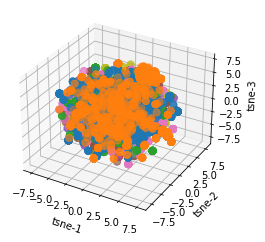

In [51]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


x = df['tsne_3d_one']
y = df['tsne_3d_two']
z = df['tsne_3d_three']



targets = df['week_month_year'].unique().tolist()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan'] # 'tab:olive', 
for target, color in zip(targets,colors):
    indicesToKeep = df['week_month_year'] == target
    ax.scatter(df.loc[indicesToKeep, 'tsne_3d_one'], 
               df.loc[indicesToKeep, 'tsne_3d_two'],
               df.loc[indicesToKeep, 'tsne_3d_three'],
               c = color, 
               s = 50)

# ax.scatter(x, y, z, c='', marker='o')


ax.set_xlabel('tsne-1')
ax.set_ylabel('tsne-2')
ax.set_zlabel('tsne-3')

plt.show()



